## <span style="color:#2F749F;"><strong>📦 Sesión práctica 4: Introducción a datos atípicos</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_4_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

Relacione sus datos y los del compañero de trabajo

Geraldine Acevedo Restrepo

geraldine.acevedo@udea.edu.co

Guillermo Mejía Uribe

guillermo.mejia@udea.edu.co

# <span style="color:#2F749F;"><strong>Ejercicio 1: Intervalo IQR</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

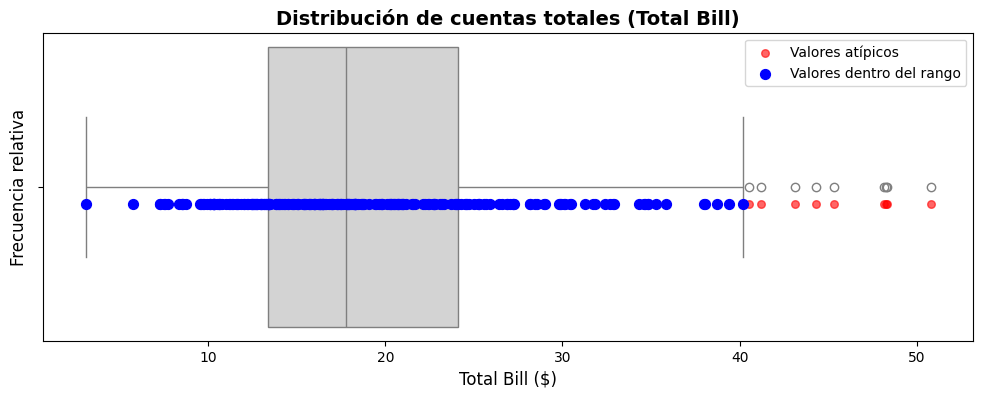

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
total_bill = tips["total_bill"].values

Q1, Q3 = np.percentile(total_bill, [25, 75])
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

data_a = total_bill[(total_bill < lim_inf) | (total_bill > lim_sup)]
data_b = total_bill[(total_bill >= lim_inf) & (total_bill <= lim_sup)]

plt.figure(figsize=(12,4))
sns.boxplot(x=total_bill, color="lightgray")

plt.scatter(data_a, [0.05]*len(data_a), color="red", s=30, alpha=0.6, label="Valores atípicos")
plt.scatter(data_b, [0.05]*len(data_b), color="blue", s=50, zorder=5, label="Valores dentro del rango")

plt.title("Distribución de cuentas totales (Total Bill)", fontsize=14, fontweight="bold")
plt.xlabel("Total Bill ($)", fontsize=12)
plt.ylabel("Frecuencia relativa", fontsize=12)

plt.legend()

plt.show()


La mayoría de los valores de total_bill se concentran dentro del rango definido por el IQR, alrededor de los 10 a 30 dólares. Los valores atípicos se ubican principalmente por encima de los 40 dólares, indicando cuentas excepcionalmente altas. La presencia de varios outliers hacia la derecha sugiere una asimetría positiva en la distribución de las cuentas.

# <span style="color:#2F749F;"><strong>Ejercicio 2: Graficos de dispersión</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

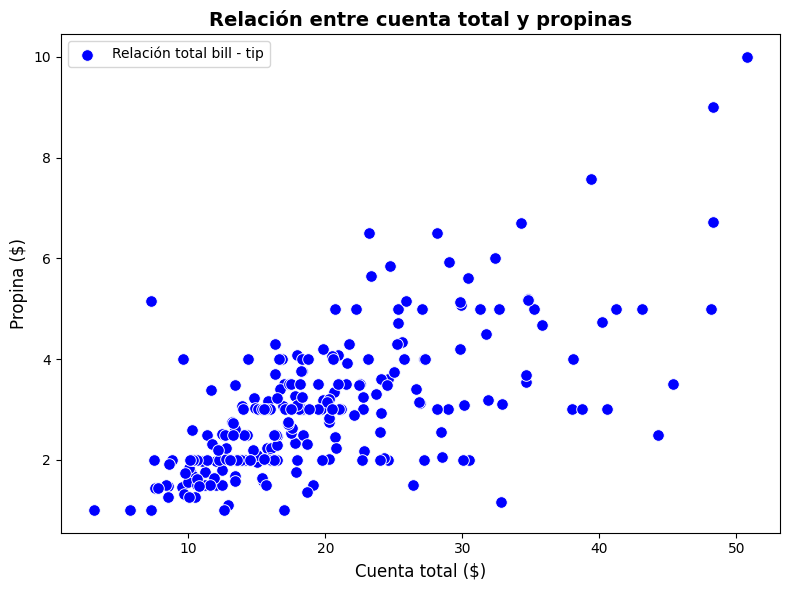

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tips = sns.load_dataset("tips")

x = tips["total_bill"].values
y = tips["tip"].values

plt.figure(figsize=(8,6))

sns.scatterplot(x=x, y=y, s=70, color="blue", label="Relación total bill - tip")

plt.xlabel("Cuenta total ($)", fontsize=12)
plt.ylabel("Propina ($)", fontsize=12)

plt.title("Relación entre cuenta total y propinas", fontsize=14, fontweight="bold")

plt.legend()

plt.tight_layout()
plt.show()


La mayoría de los puntos se concentran entre cuentas totales de 10 a 30 dólares con propinas de 1 a 5 dólares, lo que representa el comportamiento esperado. Se observan algunos valores aislados de propinas muy altas (>8 dólares) para cuentas totales grandes, que pueden considerarse atípicos positivos. También hay casos con cuentas elevadas (>40 dólares) con propinas relativamente bajas (<5 dólares), lo que rompe la tendencia y se interpreta como outliers.


# <span style="color:#2F749F;"><strong>Ejercicio 3: Histogramas y funciones de densidad</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

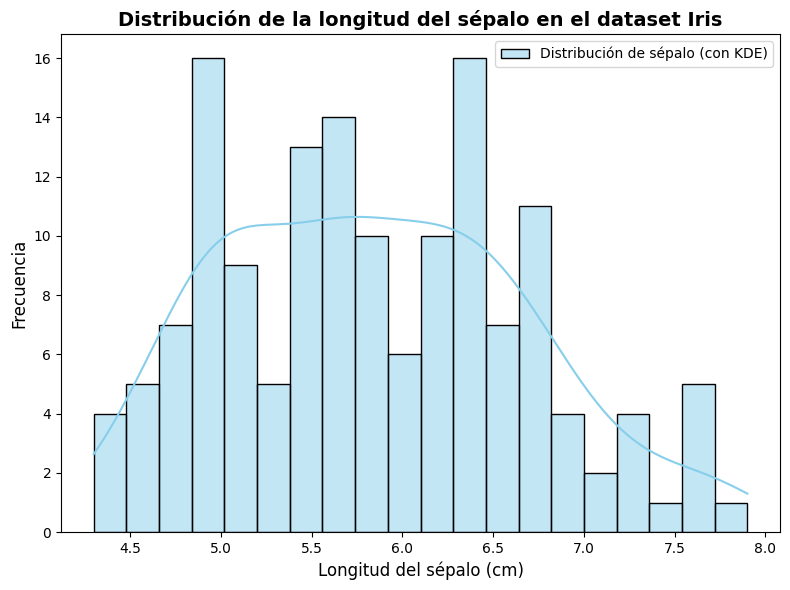

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = sns.load_dataset("iris")
x = iris["sepal_length"].values

plt.figure(figsize=(8,6))

sns.histplot(x=x, bins=20, kde=True, color="skyblue", label="Distribución de sépalo (con KDE)")

plt.xlabel("Longitud del sépalo (cm)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

plt.title("Distribución de la longitud del sépalo en el dataset Iris", fontsize=14, fontweight="bold")

plt.legend()

plt.tight_layout()
plt.show()

La mayoría de valores de longitud de sépalo se concentran entre 5 y 6.5 cm. Se observa una ligera cola hacia la derecha (valores > 7.5 cm) que pueden considerarse atípicos. También existen pocos valores muy bajos (< 4.5 cm), que se apartan del grueso de la distribución. Estos extremos nos dan la idea de que pueden haber posibles outliers tanto en la cola inferior como en la superior.

# <span style="color:#2F749F;"><strong>Ejercicio 4: Z-Score</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

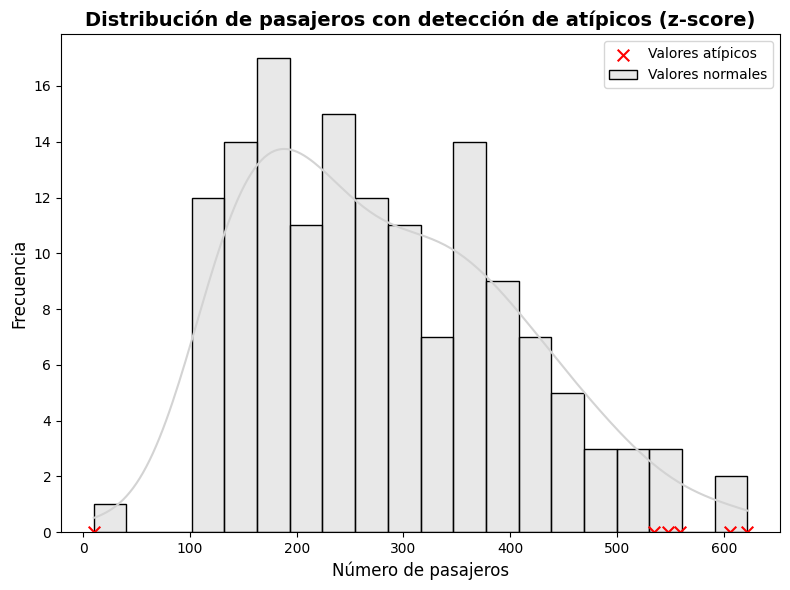

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

flights = sns.load_dataset("flights")
x = flights["passengers"].values

x = np.append(x, [10, 500])

z_scores = zscore(x)
data_b = np.abs(z_scores) > 2

plt.figure(figsize=(8,6))

sns.histplot(x=x, bins=20, kde=True, color="lightgray", label="Valores normales")

plt.scatter(x[data_b], np.zeros_like(x[data_b]),
            color="red", s=70, marker="x", label="Valores atípicos")

plt.xlabel("Número de pasajeros", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de pasajeros con detección de atípicos (z-score)", fontsize=14, fontweight="bold")

plt.legend()

plt.tight_layout()
plt.show()


La mayoría de los pasajeros se concentran entre 100 y 400, lo que representa el comportamiento normal. Se identifican valores atípicos en los extremos, tanto en la parte baja (~0–50) como en la parte alta (>500). Estos puntos se apartan significativamente de la tendencia central según el criterio de z-score. La presencia de estos extremos indica posibles registros inusuales o situaciones excepcionales.


# <span style="color:#2F749F;"><strong>Ejercicio 5: K-means</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

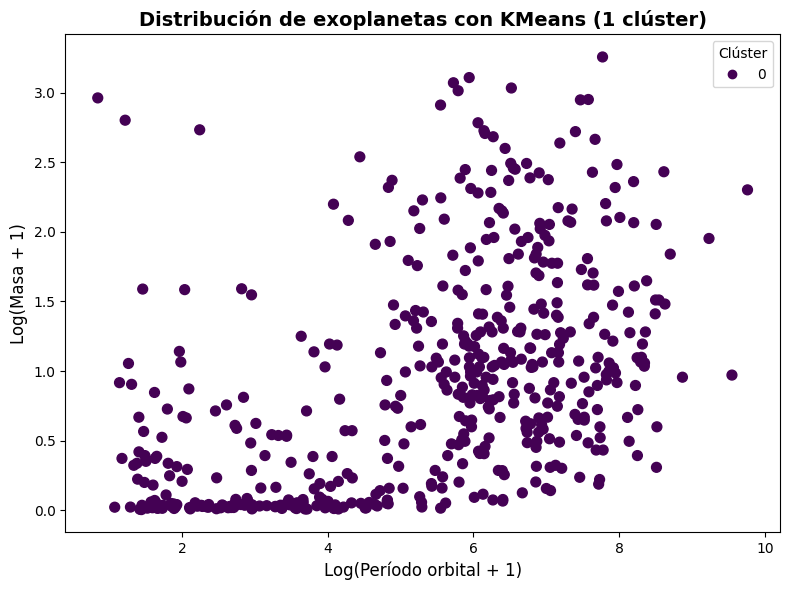

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

planets = sns.load_dataset("planets").dropna(subset=["orbital_period", "mass"])
X = planets[["orbital_period", "mass"]].values
X = np.log1p(X)

kmeans = KMeans(n_clusters=1, random_state=42).fit(X)
labels = kmeans.labels_

plt.figure(figsize=(8,6))
scatter = plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=50)

plt.xlabel("Log(Período orbital + 1)", fontsize=12)
plt.ylabel("Log(Masa + 1)", fontsize=12)

plt.title("Distribución de exoplanetas con KMeans (1 clúster)", fontsize=14, fontweight="bold")

plt.legend(*scatter.legend_elements(), title="Clúster")

plt.tight_layout()
plt.show()

La mayoría de los exoplanetas se concentran en rangos medios de período orbital (log ~5–7) y masa (log ~0–1.5). Se aprecian valores extremos con períodos orbitales muy bajos (<2) y muy altos (>9), que podrían considerarse atípicos.mEn cuanto a la masa, existen también algunos puntos por encima de 3 en log(masa+1), alejados de la distribución central. Estos valores atípicos destacan frente a la nube principal y sugieren exoplanetas con características poco comunes.